# Summer of Code - Artificial Intelligence

## Week 05: Introduction to Machine Learning

### Day 02: Machine Learning Fundamentals and Linear Regression

In this lecture we will learn about the fundamentals of Machine Learning (ML) and focus on Linear Regression as a key algorithm.


# Introduction to Scikit-Learn

**Scikit-learn** is the most popular machine learning library in Python. It provides simple and efficient tools for data mining and data analysis.


Linear Regression on Housing Data


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Step 2: Load and explore the dataset
df = pd.read_csv("../../datasets/california_house_prices/housing.csv")

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (20640, 10)
Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Handle missing values
print(f"Missing values in total_bedrooms: {df['total_bedrooms'].isnull().sum()}")
df.fillna(
  {"total_bedrooms": df["total_bedrooms"].median()},
  inplace=True)
print("Missing values handled!")


Missing values in total_bedrooms: 0
Missing values handled!


In [5]:
# Create derived features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [6]:
# Handle categorical variable (ocean_proximity)
print(f"Unique values in ocean_proximity: {df['ocean_proximity'].unique()}")
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"], prefix="ocean")
df_encoded.head()

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,False,True,False


In [ ]:
# Select features for modeling
feature_columns = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
] + [col for col in df_encoded.columns if col.startswith("ocean_")]

X = df_encoded[feature_columns]
y = df_encoded["median_house_value"]

print(f"\nSelected features: {len(feature_columns)}")
print(f"Feature names: {feature_columns}")
print("Target variable: median_house_value")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


Selected features: 14
Feature names: ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN']
Target variable: median_house_value
X shape: (20640, 14)
y shape: (20640,)


In [9]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")



Training set size: 16512 samples
Testing set size: 4128 samples
Training features shape: (16512, 14)
Testing features shape: (4128, 14)


In [10]:
# Create scaler object
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")


Features scaled successfully!


In [11]:
# Create Linear Regression model
model = LinearRegression()

# Train the model on scaled training data
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")
print(f"Model type: {type(model).__name__}")


Model trained successfully!
Model type: LinearRegression


In [12]:
# Display model parameters
print("Model parameters:")
print(f"Number of features: {model.n_features_in_}")
print(f"Intercept (bias): ${model.intercept_:,.2f}")
print(f"Number of coefficients: {len(model.coef_)}")

Model parameters:
Number of features: 14
Intercept (bias): $207,194.69
Number of coefficients: 14


In [13]:
# Make predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Make predictions on testing data
y_test_pred = model.predict(X_test_scaled)

print("Predictions made successfully!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")

# Display sample predictions
print("\nSample predictions vs actual values:")
sample_data = pd.DataFrame(
    {
        "Actual": y_test.head(10).values,
        "Predicted": y_test_pred[:10],
        "Difference": y_test.head(10).values - y_test_pred[:10],
    }
)
sample_data.round(2)

Predictions made successfully!
Training predictions shape: (16512,)
Testing predictions shape: (4128,)

Sample predictions vs actual values:


,Actual,Predicted,Difference
0,47700.0,63337.02,-15637.02
1,45800.0,90618.12,-44818.12
2,500001.0,272077.40,227923.60
3,218600.0,261622.71,-43022.71
4,278000.0,235108.99,42891.01
5,158700.0,149823.94,8876.06
6,198200.0,311337.37,-113137.37
7,157500.0,246075.70,-88575.70
8,340000.0,253033.65,86966.35
9,446600.0,422131.33,24468.67


In [14]:
# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results

print("Testing Set Performance:")
print(f"  Mean Squared Error (MSE): ${test_mse:,.0f}")
print(f"  Root Mean Squared Error (RMSE): ${np.sqrt(test_mse):,.0f}")
print(f"  Mean Absolute Error (MAE): ${test_mae:,.0f}")
print(f"  R² Score: {test_r2:.4f}")

# Interpretation
print("\nModel Interpretation:")
print(
    f"  R² Score: {test_r2:.1%} of variance in house prices is explained by our model"
)
print(f"  RMSE: On average, our predictions are off by ${np.sqrt(test_mse):,.0f}")
print(f"  MAE: On average, our predictions are off by ${test_mae:,.0f}")

Testing Set Performance:
  Mean Squared Error (MSE): $5,402,094,982
  Root Mean Squared Error (RMSE): $73,499
  Mean Absolute Error (MAE): $51,497
  R² Score: 0.5878

Model Interpretation:
  R² Score: 58.8% of variance in house prices is explained by our model
  RMSE: On average, our predictions are off by $73,499
  MAE: On average, our predictions are off by $51,497


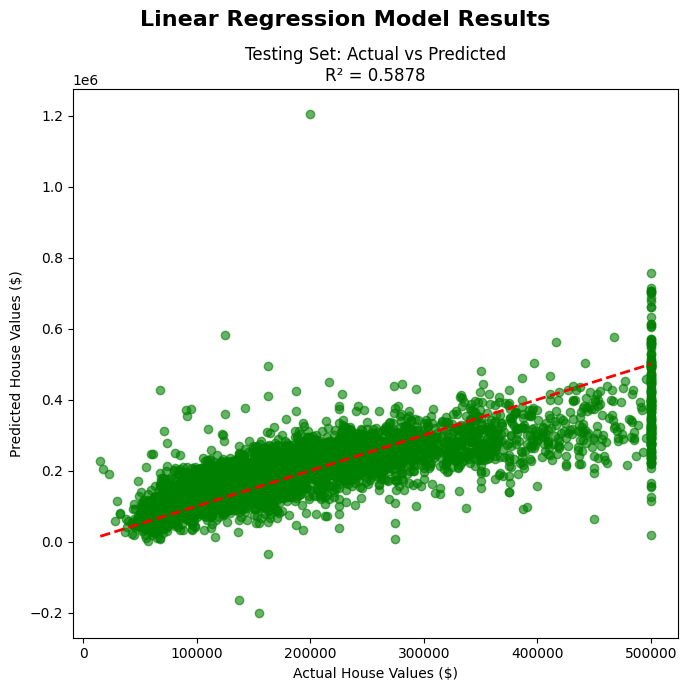

In [19]:
# Create visualizations
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
fig.suptitle("Linear Regression Model Results", fontsize=16, fontweight="bold")

# Plot: Actual vs Predicted (Testing)
axes.scatter(y_test, y_test_pred, alpha=0.6, color="green")
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
axes.set_xlabel("Actual House Values ($)")
axes.set_ylabel("Predicted House Values ($)")
axes.set_title(f"Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}")

plt.tight_layout()
plt.show()

In [20]:
# Example: Predict house price for a new house
new_house = {
    "housing_median_age": 15,
    "total_rooms": 2000,
    "total_bedrooms": 300,
    "population": 1000,
    "households": 400,
    "median_income": 6.5,
    "rooms_per_household": 5.0,
    "bedrooms_per_room": 0.15,
    "population_per_household": 2.5,
    "ocean_<1H OCEAN": 1,
    "ocean_INLAND": 0,
    "ocean_ISLAND": 0,
    "ocean_NEAR BAY": 0,
    "ocean_NEAR OCEAN": 0,
}

# Create DataFrame for new house
new_house_df = pd.DataFrame([new_house])

# Select only the features used in training
new_house_features = new_house_df[feature_columns]

# Scale the features using the same scaler
new_house_scaled = scaler.transform(new_house_features)

# Make prediction
predicted_price = model.predict(new_house_scaled)[0]

print("New House Features:")
for feature, value in new_house.items():
    if feature in feature_columns:
        print(f"  {feature}: {value}")

print(f"\nPredicted House Price: ${predicted_price:,.0f}")
print(f"Prediction confidence: Based on R² = {test_r2:.1%}")

# Compare with average house price
avg_price = y.mean()
print("\nComparison:")
print(f"  Predicted price: ${predicted_price:,.0f}")
print(f"  Average price: ${avg_price:,.0f}")
print(f"  Difference: ${predicted_price - avg_price:,.0f}")

New House Features:
  housing_median_age: 15
  total_rooms: 2000
  total_bedrooms: 300
  population: 1000
  households: 400
  median_income: 6.5
  rooms_per_household: 5.0
  bedrooms_per_room: 0.15
  population_per_household: 2.5
  ocean_<1H OCEAN: 1
  ocean_INLAND: 0
  ocean_ISLAND: 0
  ocean_NEAR BAY: 0
  ocean_NEAR OCEAN: 0

Predicted House Price: $305,676
Prediction confidence: Based on R² = 58.8%

Comparison:
  Predicted price: $305,676
  Average price: $206,856
  Difference: $98,820
